
Title: Random Forest Regressor for Property Prediction
=======
- Created: 2019.10.03
- Updated: 2020.03.08
- Author: Kyung Min, Lee

Learned from 
- "Chapter 2 of Hands-on Machine Learning Book"
- Sckit-Learn documents


## A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

> class sklearn.ensemble.RandomForestRegressor(n_estimators=’warn’, criterion=’mse’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)[source]

HyperParameters
---


- **n_estimators**[integer, optional (default=10)]: The number of trees in the forest.
  - Changed in version 0.20: The default value of n_estimators will change from 10 in version 0.20 to 100 in version 0.22.
  
- **criterion**[string, optional (default=”mse”)]: The function to measure the quality of a split.   
  - Supported criteria are “mse” for the mean squared error, which is equal to variance reduction as feature selection criterion, and “mae” for the mean absolute error.

- **max_depth**[integer or None, optional (default=None)]: The maximum depth of the tree. 
  - If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
  
- **min_samples_split**[int, float, optional (default=2)]: The minimum number of samples required to split an internal node:
  - If int, then consider min_samples_split as the minimum number.
  - If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
  
- **min_samples_leaf**[int, float, optional (default=1)]: The minimum number of samples required to be at a leaf node. 
  - A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. <u>This may have the effect of smoothing the model, especially in regression.</u>
  - If int, then consider min_samples_leaf as the minimum number.
  - If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
  
- **min_weight_fraction_leaf**[float, optional (default=0.)]
  - The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. 
  - Samples have equal weight when sample_weight is not provided.
  
- **max_features**[int, float, string or None, optional (default=”auto”)]: The number of features to consider when looking for the best split:
  - If int, then consider max_features features at each split.
  - If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
  - If “auto”, then max_features=n_features.
  - If “sqrt”, then max_features=sqrt(n_features).
  - If “log2”, then max_features=log2(n_features).
  - If None, then max_features=n_features.
Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

- **max_leaf_nodes**[int or None, optional (default=None)]: Grow trees with max_leaf_nodes in best-first fashion.
  - Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
  
- **min_impurity_decrease**[float, optional (default=0.)]: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
  - The weighted impurity decrease equation is the following: (Node importance using Gini Importace)
  ![gini_imp](https://miro.medium.com/max/757/1*mcHzG8OjhQ2ryiBH7MBPUA.png)
  ![gini_imp1](https://miro.medium.com/max/1498/1*uAGS042OxMJ4Ic3k4s313Q.png)
  ![gini_imp2](https://miro.medium.com/max/2829/1*gdMrk7yEPJLio0d0Sixtkg.png)
  ![gini_imp3](https://miro.medium.com/max/1634/1*C-bkgMBs4drNVyBb1VJcEQ.png)
  
- **bootstrap**[boolean, optional (default=True)]: Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.

- **oob_score**[bool, optional (default=False)]: whether to use out-of-bag samples to estimate the R^2 on unseen data.

- **n_jobs**[int or None, optional (default=None)]: The number of jobs to run in parallel for both fit and predict. 
  - None` means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.
  
- **random_state**[int, RandomState instance or None, optional (default=None)] 
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

- **verbose**[int, optional (default=0)]: Controls the verbosity when fitting and predicting.

- **warm_start**[bool, optional (default=False)]: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest. 




Explanation of Random Forest's Main Parameters
---

random forest model에서 주요 parameter는

n_estimators : 생성할 tree의 개수와

max_features : 최대 선택할 특성의 수입니다.

random forest는 기본적으로 bootstrap sampling(복원추출)을 사용하며 decision tree 생성으로 algorithm으로 진행합니다.

bootstrap sampling에서 어떤 데이터 포인트는 약 36.6%정도 누락될 확률이 존재하는데
이 것은 다음과정으로 확인할 수 있습니다.

 - 100개의 표본중 표본 하나가 선택되지 않을 확률은 99/100
 - 뽑은 표본을 제외하지 않고 100번 반복할 때 한번도 선택되지 않을 확률: (0.99)^100 = 0.366

 

n_estimators에서bootstrap sampling은 random forest의 tree가 조금씩 다른 데이터셋으로 만들어지도록합니다. max_feature에서 각 node는 특성의 일부를 무작위로 추출하여 사용합니다.
max_features를 전체 특성의수로 설정하면 모든 특성을 고려하므로 decision tree에서 무작위성이 들어가지 않습니다.

그러나 bootstrap sampling의 무작위성은 존재합니다.

max_features 값을 크게 하면 random forest의 tree들은 같은 특성을 고려하므로 tree들이 매우 비슷해지고 가장 두드러진 특성을 이용해 데이터에 잘 맞춰집니다.

max_features를 낮추면 random forest tree들은 많이 달라지고 각 tree는 데이터에 맞추기 위해 tree의 깊이가 깊어집니다.

출처: https://woolulu.tistory.com/28

Attributes
---

- **estimators_**[list of DecisionTreeRegressor]: The collection of fitted sub-estimators.

- **feature_importances_**[array of shape = [n_features]] :Return the feature importances (the higher, the more important the feature).

- **n_features_**[int]: The number of features when fit is performed.

- **n_outputs_**[int]: The number of outputs when fit is performed.

- **oob_score_**[float]: Score of the training dataset obtained using an out-of-bag estimate.

- **oob_prediction_**[array of shape = [n_samples]]: Prediction computed with out-of-bag estimate on the training set.

Setup
---

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn

# Common imports
import numpy as np
import os

# Pandas
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
sklearn.__version__

'0.23.1'

Get the data
============

In [3]:
from google.colab import files
uploaded=files.upload()

for fn in uploaded.keys():
  print('User uploaded file"{name}" with length{length} bytes'.format(
      name = fn, length=len(uploaded[fn])
  ))

Saving 3MA_data.csv to 3MA_data.csv
User uploaded file"3MA_data.csv" with length21539 bytes


In [0]:
from google.colab import drive

drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import pandas as pd

#df = pd.read_csv("3MA_data.csv")
df = pd.read_excel("induced_voltage_corrected_10-1000Hz.xlsx", sheet_name='real,imag', skiprows=0)
df.head()


,yield stress,elongation,10Hz_real,10Hz_img,20Hz_real,20Hz_img,30Hz_real,30Hz_img,40Hz_real,40Hz_img,...,600Hz_real,600Hz_img,700Hz_real,700Hz_img,800Hz_real,800Hz_img,900Hz_real,900Hz_img,1000Hz_real,1000Hz_img
0,150.00,0.000,-0.001414,0.279324,0.065215,0.546686,0.168532,0.791553,0.302864,1.011364,...,2.655202,0.539650,2.680330,0.469237,2.695789,0.404472,2.705355,0.346958,2.706814,0.319128
1,152.91,0.015,-0.001659,0.276647,0.063820,0.541352,0.165763,0.785004,0.298546,1.004237,...,2.651860,0.543106,2.675930,0.473155,2.692702,0.407210,2.702469,0.349359,2.704990,0.320804
2,177.60,0.030,-0.001749,0.275758,0.063441,0.539802,0.164783,0.782727,0.297116,1.001919,...,2.651055,0.543917,2.675396,0.473876,2.691407,0.408197,2.701249,0.350062,2.703893,0.321462
3,198.41,0.045,-0.001446,0.277171,0.064370,0.542550,0.167191,0.787736,0.300250,1.006919,...,2.655886,0.542657,2.679951,0.472497,2.695292,0.407137,2.704857,0.349130,2.707274,0.320120
4,216.86,0.060,-0.001577,0.275907,0.063855,0.540547,0.165830,0.784585,0.297793,1.002867,...,2.653140,0.544369,2.678150,0.473694,2.694017,0.408031,2.703790,0.349735,2.705954,0.320936


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yield stress  27 non-null     float64
 1   elongation    27 non-null     float64
 2   10Hz_real     27 non-null     float64
 3   10Hz_img      27 non-null     float64
 4   20Hz_real     27 non-null     float64
 5   20Hz_img      27 non-null     float64
 6   30Hz_real     27 non-null     float64
 7   30Hz_img      27 non-null     float64
 8   40Hz_real     27 non-null     float64
 9   40Hz_img      27 non-null     float64
 10  50Hz_real     27 non-null     float64
 11  50Hz_img      27 non-null     float64
 12  60Hz_real     27 non-null     float64
 13  60Hz_img      27 non-null     float64
 14  70Hz_real     27 non-null     float64
 15  70Hz_img      27 non-null     float64
 16  80Hz_real     27 non-null     float64
 17  80Hz_img      27 non-null     float64
 18  90Hz_real     27 non-null     fl

6 Variable (1k_voltage, 1k_RE, 1k_IM, 5k_voltage, 5k_RE, 5k_Im) data
---

In [6]:
df = df.loc[:,["yield stress", "elongation","1k_voltage", "1k_RE", "1k_IM", "5k_voltage", "5k_RE", "5k_IM"]]
df = df.drop(df.index[190:209])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 8 columns):
yield stress    190 non-null float64
elongation      190 non-null float64
1k_voltage      190 non-null float64
1k_RE           190 non-null float64
1k_IM           190 non-null float64
5k_voltage      190 non-null float64
5k_RE           190 non-null float64
5k_IM           190 non-null float64
dtypes: float64(8)
memory usage: 13.4 KB


In [5]:
df.describe()

,yield stress,elongation,10Hz_real,10Hz_img,20Hz_real,20Hz_img,30Hz_real,30Hz_img,40Hz_real,40Hz_img,...,600Hz_real,600Hz_img,700Hz_real,700Hz_img,800Hz_real,800Hz_img,900Hz_real,900Hz_img,1000Hz_real,1000Hz_img
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,270.816667,0.195000,-0.002212,0.270699,0.061132,0.530466,0.159799,0.770439,0.288163,0.986603,...,2.643873,0.551160,2.668801,0.480020,2.685527,0.413568,2.695814,0.354577,2.698120,0.326146
std,53.111523,0.119059,0.000563,0.004475,0.002240,0.008215,0.004998,0.011577,0.008221,0.013650,...,0.008120,0.006278,0.007920,0.005763,0.007047,0.005120,0.006488,0.004357,0.006591,0.004691
min,150.000000,0.000000,-0.003737,0.260139,0.055922,0.512395,0.147061,0.741791,0.268536,0.954541,...,2.621856,0.539650,2.647809,0.469237,2.666612,0.404472,2.678862,0.346958,2.681545,0.319128
25%,244.640000,0.097500,-0.002543,0.267912,0.059686,0.524729,0.156907,0.763384,0.282905,0.977648,...,2.638015,0.546147,2.663723,0.475433,2.680966,0.409510,2.691946,0.351123,2.694700,0.322440
50%,288.010000,0.195000,-0.002058,0.270652,0.061370,0.530378,0.160310,0.771117,0.288825,0.987216,...,2.645842,0.551254,2.670596,0.479860,2.687069,0.413328,2.697153,0.354339,2.699347,0.325244
75%,312.095000,0.292500,-0.001807,0.273761,0.062673,0.535983,0.163215,0.778185,0.293894,0.995922,...,2.648695,0.555530,2.673524,0.484710,2.689762,0.417489,2.699594,0.357868,2.702265,0.329593
max,328.460000,0.390000,-0.001414,0.279324,0.065215,0.546686,0.168532,0.791553,0.302864,1.011364,...,2.655886,0.566322,2.680330,0.494277,2.695789,0.426640,2.705355,0.365693,2.707274,0.338066


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B719131E20>,
      dtype=object)

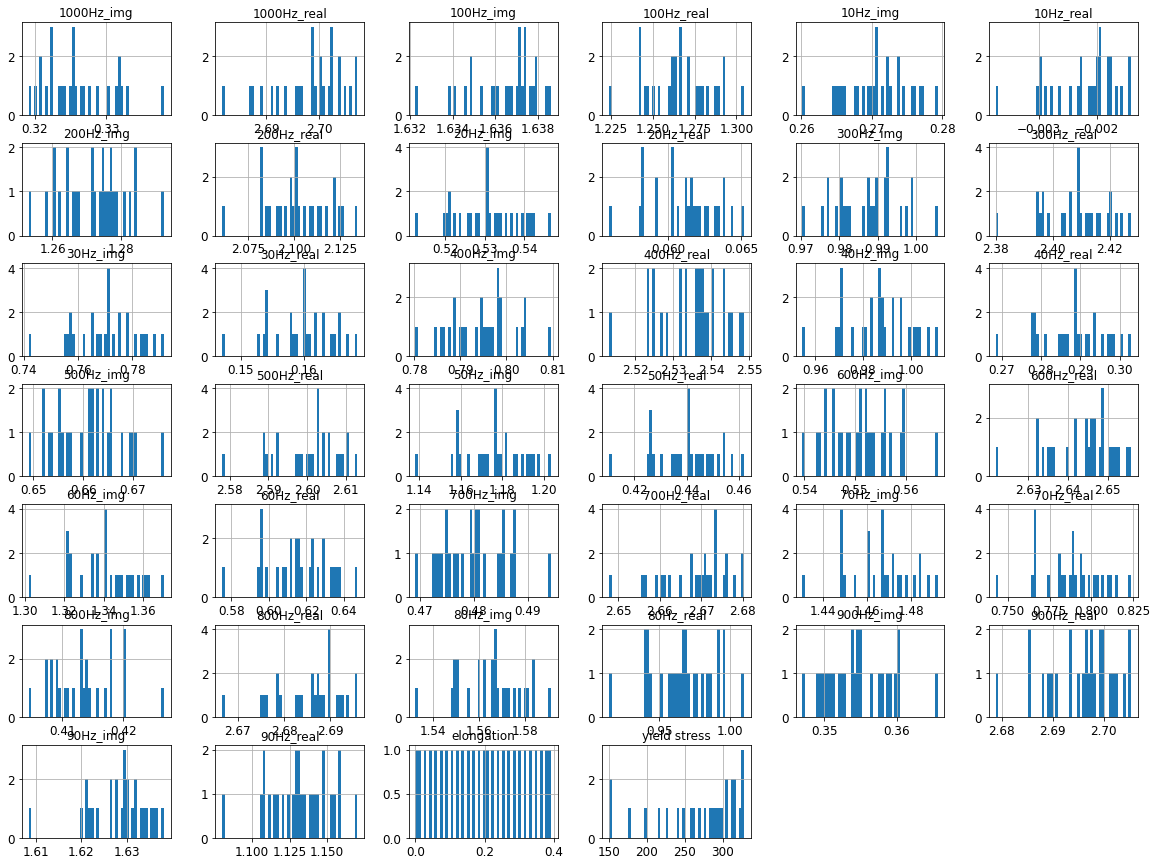

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

In [7]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [13]:
# train, test data split
from sklearn.model_selection import train_test_split

X = df.loc[:,["10Hz_real", "10Hz_img", "20Hz_real", "20Hz_img","30Hz_real", "30Hz_img","40Hz_real", "40Hz_img","50Hz_real", "50Hz_img","60Hz_real", "60Hz_img","70Hz_real", "70Hz_img","80Hz_real", "80Hz_img","90Hz_real", "90Hz_img","100Hz_real", "100Hz_img",
             "200Hz_real", "200Hz_img","300Hz_real", "300Hz_img","400Hz_real", "400Hz_img","500Hz_real", "500Hz_img","600Hz_real", "600Hz_img","700Hz_real", "700Hz_img","800Hz_real", "800Hz_img","900Hz_real", "900Hz_img","1000Hz_real", "1000Hz_img"]]
ys = df.loc[:,"yield stress"]
elong = df.loc[:,"elongation"]

X_train, X_test, ys_train, ys_test = train_test_split(X, ys, test_size=0.2, random_state=42)
X_train, X_test, el_train, el_test = train_test_split(X, elong, test_size=0.2, random_state=42)
len(X_train)

21

In [14]:
len(X_test)

6

Discover and visualize the data to gain insights
===

In [8]:
# Copy the dataset in order not to harm train set
df_copy = df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yield stress  27 non-null     float64
 1   elongation    27 non-null     float64
 2   10Hz_real     27 non-null     float64
 3   10Hz_img      27 non-null     float64
 4   20Hz_real     27 non-null     float64
 5   20Hz_img      27 non-null     float64
 6   30Hz_real     27 non-null     float64
 7   30Hz_img      27 non-null     float64
 8   40Hz_real     27 non-null     float64
 9   40Hz_img      27 non-null     float64
 10  50Hz_real     27 non-null     float64
 11  50Hz_img      27 non-null     float64
 12  60Hz_real     27 non-null     float64
 13  60Hz_img      27 non-null     float64
 14  70Hz_real     27 non-null     float64
 15  70Hz_img      27 non-null     float64
 16  80Hz_real     27 non-null     float64
 17  80Hz_img      27 non-null     float64
 18  90Hz_real     27 non-null     fl

In [0]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 51 to 102
Data columns (total 6 columns):
1k_voltage    152 non-null float64
1k_RE         152 non-null float64
1k_IM         152 non-null float64
5k_voltage    152 non-null float64
5k_RE         152 non-null float64
5k_IM         152 non-null float64
dtypes: float64(6)
memory usage: 8.3 KB


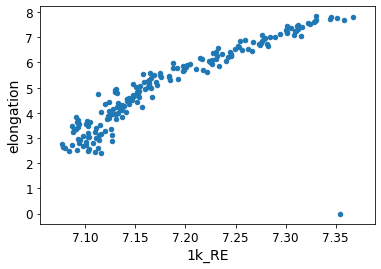

In [0]:
df_copy.plot(kind="scatter", x="1k_RE", y="elongation")

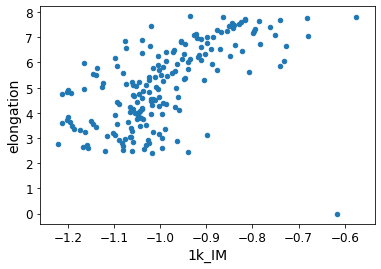

In [0]:
df_copy.plot(kind="scatter", x="1k_IM", y="elongation")

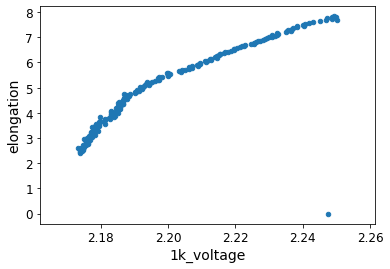

In [0]:
df_copy.plot(kind="scatter", x="1k_voltage", y="elongation")

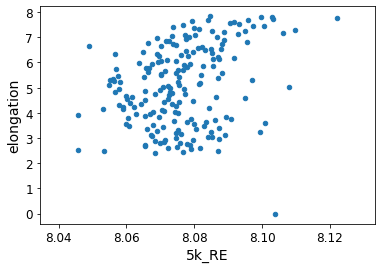

In [0]:
df_copy.plot(kind="scatter", x="5k_RE", y="elongation")

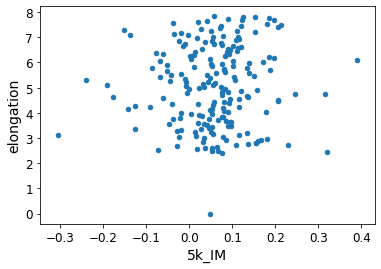

In [0]:
df_copy.plot(kind="scatter", x="5k_IM", y="elongation")

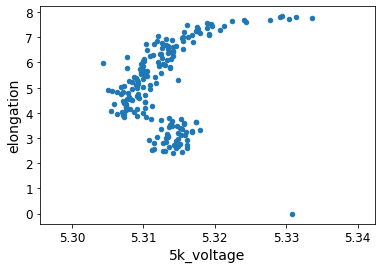

In [0]:
df_copy.plot(kind="scatter", x="5k_voltage", y="elongation")

In [9]:
# Analysis of Standard correlation coefficient
corr_matrix = df_copy.corr()
corr_matrix

,yield stress,elongation,10Hz_real,10Hz_img,20Hz_real,20Hz_img,30Hz_real,30Hz_img,40Hz_real,40Hz_img,...,600Hz_real,600Hz_img,700Hz_real,700Hz_img,800Hz_real,800Hz_img,900Hz_real,900Hz_img,1000Hz_real,1000Hz_img
yield stress,1.000000,0.940499,-0.677522,-0.834114,-0.779720,-0.833671,-0.784261,-0.811725,-0.798632,-0.812098,...,-0.662665,0.857666,-0.638346,0.828524,-0.661951,0.824030,-0.654419,0.808162,-0.632955,0.746391
elongation,0.940499,1.000000,-0.662663,-0.813865,-0.746759,-0.801950,-0.766515,-0.793035,-0.773193,-0.786649,...,-0.625712,0.874214,-0.594391,0.839223,-0.621204,0.840465,-0.604297,0.820625,-0.579987,0.746245
10Hz_real,-0.677522,-0.662663,1.000000,0.968728,0.984603,0.966371,0.985251,0.976166,0.981241,0.976411,...,0.992075,-0.937840,0.989358,-0.956389,0.991290,-0.956831,0.986487,-0.965196,0.982632,-0.988288
10Hz_img,-0.834114,-0.813865,0.968728,1.000000,0.991846,0.997355,0.995131,0.997944,0.996019,0.997229,...,0.955882,-0.988466,0.945653,-0.992398,0.954795,-0.990967,0.948058,-0.991709,0.936422,-0.985036
20Hz_real,-0.779720,-0.746759,0.984603,0.991846,1.000000,0.995363,0.995837,0.994192,0.997692,0.996665,...,0.979020,-0.966509,0.974692,-0.978366,0.979264,-0.975502,0.976153,-0.980964,0.969313,-0.990390
20Hz_img,-0.833671,-0.801950,0.966371,0.997355,0.995363,1.000000,0.993276,0.996219,0.996493,0.997863,...,0.958432,-0.980521,0.950609,-0.986187,0.958372,-0.983100,0.954091,-0.985370,0.944125,-0.982828
30Hz_real,-0.784261,-0.766515,0.985251,0.995131,0.995837,0.993276,1.000000,0.998815,0.998396,0.997759,...,0.977930,-0.977577,0.969464,-0.986161,0.976242,-0.985337,0.970713,-0.989163,0.961173,-0.992605
30Hz_img,-0.811725,-0.793035,0.976166,0.997944,0.994192,0.996219,0.998815,1.000000,0.998073,0.998720,...,0.968339,-0.983853,0.958279,-0.989416,0.966661,-0.988410,0.960838,-0.990806,0.949860,-0.988701
40Hz_real,-0.798632,-0.773193,0.981241,0.996019,0.997692,0.996493,0.998396,0.998073,1.000000,0.999608,...,0.974675,-0.977576,0.967323,-0.986128,0.973514,-0.984166,0.968945,-0.987979,0.960472,-0.991746
40Hz_img,-0.812098,-0.786649,0.976411,0.997229,0.996665,0.997863,0.997759,0.998720,0.999608,1.000000,...,0.970010,-0.980424,0.961633,-0.987241,0.968814,-0.985296,0.964115,-0.988423,0.954832,-0.989380


In [10]:
# Check what affects the most for the yield stress
corr_matrix["yield stress"].sort_values(ascending=False)


# 1kHz_voltage > 1k_RE > 1k_IM


yield stress    1.000000
elongation      0.940499
200Hz_img       0.916553
400Hz_img       0.907907
300Hz_img       0.907607
500Hz_img       0.885573
600Hz_img       0.857666
700Hz_img       0.828524
800Hz_img       0.824030
900Hz_img       0.808162
1000Hz_img      0.746391
100Hz_img      -0.498008
1000Hz_real    -0.632955
700Hz_real     -0.638346
900Hz_real     -0.654419
800Hz_real     -0.661951
600Hz_real     -0.662665
10Hz_real      -0.677522
500Hz_real     -0.682411
90Hz_img       -0.726369
400Hz_real     -0.735641
20Hz_real      -0.779720
30Hz_real      -0.784261
300Hz_real     -0.792334
70Hz_img       -0.795107
50Hz_real      -0.796171
40Hz_real      -0.798632
50Hz_img       -0.801158
60Hz_img       -0.803969
80Hz_img       -0.806033
70Hz_real      -0.807258
30Hz_img       -0.811725
40Hz_img       -0.812098
60Hz_real      -0.821782
80Hz_real      -0.827194
90Hz_real      -0.827258
20Hz_img       -0.833671
10Hz_img       -0.834114
200Hz_real     -0.855021
100Hz_real     -0.858779


In [11]:
corr_matrix["elongation"].sort_values(ascending=False)

elongation      1.000000
yield stress    0.940499
400Hz_img       0.920748
200Hz_img       0.919195
300Hz_img       0.917013
500Hz_img       0.904099
600Hz_img       0.874214
800Hz_img       0.840465
700Hz_img       0.839223
900Hz_img       0.820625
1000Hz_img      0.746245
100Hz_img      -0.460541
1000Hz_real    -0.579987
700Hz_real     -0.594391
900Hz_real     -0.604297
800Hz_real     -0.621204
600Hz_real     -0.625712
500Hz_real     -0.655268
10Hz_real      -0.662663
400Hz_real     -0.708538
90Hz_img       -0.723358
20Hz_real      -0.746759
70Hz_img       -0.764833
30Hz_real      -0.766515
40Hz_real      -0.773193
300Hz_real     -0.775004
50Hz_real      -0.776011
80Hz_img       -0.776233
70Hz_real      -0.777787
50Hz_img       -0.779191
60Hz_img       -0.782261
40Hz_img       -0.786649
30Hz_img       -0.793035
80Hz_real      -0.800989
20Hz_img       -0.801950
60Hz_real      -0.805256
10Hz_img       -0.813865
90Hz_real      -0.817651
100Hz_real     -0.837087
200Hz_real     -0.841142


In [0]:
print(X_train)

     1k_voltage     1k_RE     1k_IM  5k_voltage     5k_RE     5k_IM
51     2.215403  7.245305 -0.903072    5.312309  8.068984  0.092698
35     2.225431  7.275967 -0.897505    5.312577  8.066472  0.074681
118    2.186764  7.151657 -1.049820    5.310293  8.075633  0.080307
60     2.210931  7.240860 -0.730820    5.310039  8.070268  0.101880
161    2.177262  7.109777 -1.014860    5.316873  8.084991  0.013395
..          ...       ...       ...         ...       ...       ...
106    2.190218  7.131141 -1.193878    5.307907  8.073338 -0.004794
14     2.238255  7.301127 -1.019791    5.319624  8.100449  0.073257
92     2.194620  7.163972 -1.123455    5.311815  8.081840  0.059281
179    2.174875  7.086661 -1.157326    5.314225  8.078636  0.109185
102    2.190797  7.129122 -1.198810    5.305030  8.069795  0.157954

[152 rows x 6 columns]


## Feature Scaling

In [15]:
# Feature Scaling => Standardization
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

data_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])
imputer = SimpleImputer(strategy="median")

X_train_std = data_pipeline.fit_transform(X_train)

ys_train = np.array(ys_train)
ys_train =ys_train.reshape(-1, 1)
ys_train_std = data_pipeline.fit_transform(ys_train)


el_train = np.array(el_train)
el_train =el_train.reshape(-1, 1)
el_train_std = data_pipeline.fit_transform(el_train)

X_test_std =data_pipeline.fit_transform(X_test)

ys_test = np.array(ys_test)
ys_test = ys_test.reshape(-1, 1)
ys_test_std = data_pipeline.fit_transform(ys_test)

el_test = np.array(el_test)
el_test = el_test.reshape(-1, 1)
el_test_std = data_pipeline.fit_transform(el_test)


ys_test_std


array([[-0.02900451],
       [ 0.55707122],
       [ 0.08924219],
       [ 1.11086311],
       [-2.07931441],
       [ 0.35114239]])

In [16]:
#np.savetxt("ys_train.csv", ys_train, delimiter=",")

In [17]:
X_train_std.shape

(21, 38)

In [18]:
ys_train.shape

(21, 1)

In [0]:
np.random.seed(42)

Select and train a random forest regression model
===

## Yield Stress

In [10]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "BestHyperParameter/RF_Regression/yield_stress_6V"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [19]:
# Normal Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_std, ys_train_std)
ys_predictions_rf= rf_reg.predict(X_train_std) * np.std(ys_train) + np.mean(ys_train)
rf_mse = mean_squared_error(ys_train, ys_predictions_rf)
rf_rmse = np.sqrt(rf_mse)
rf_rmse


<ipython-input-19-e08c25066214>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train_std, ys_train_std)


6.721334404112375

Hyper Parameters Tuning: GridSearch CV function
---

GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [11]:
range_2 = [-10, -7,-5, -3, -1, 0]
for i in range(len(range_2)):
    range_2[i] = 10 ** range_2[i]
    
print(range_2)

[1e-10, 1e-07, 1e-05, 0.001, 0.1, 1]


In [12]:
range_2 = [0.75,0.8,0.85,0.9,0.95,1]

In [13]:
range_1 = [3,4,5]
for i in range(len(range_1)):
    range_1[i] = 10 ** range_1[i]
    
print(range_1)

[1000, 10000, 100000]


In [14]:
range_1 = [10000]

In [15]:
range_3 = [1,2]
print(range_3)

[1, 2]


In [16]:
ys_train_std.shape


(152, 1)

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators':[10000], 'max_features':[0.85],
   'min_samples_leaf':[1]
                      
    }
  ]

rf_reg = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
max_depth=None, max_features=0.9, max_leaf_nodes=None,
max_samples=None, min_impurity_decrease=0.0,
min_impurity_split=None, min_samples_leaf=1,
min_samples_split=2, min_weight_fraction_leaf=0.0,
n_estimators=10, n_jobs=None, oob_score=False,
random_state=1, verbose=0, warm_start=False)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
#grid_search = GridSearchCV(rf_reg, param_grid, cv=3,
                           #scoring='neg_mean_squared_error',
                           #return_train_score=True)
#grid_search.fit(X_train_std, ys_train_std.ravel())
rf_reg.fit(X_train_std, ys_train_std.ravel())

RandomForestRegressor(max_features=0.9, n_estimators=10, random_state=1)

In [13]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.85, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [14]:
grid_search.best_params_

{'max_features': 0.85, 'min_samples_leaf': 1, 'n_estimators': 10000}

In [15]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.06502330660376887 {'max_features': 0.85, 'min_samples_leaf': 1, 'n_estimators': 10000}


In [26]:
ys_rf_final_model = rf_reg
ys_rf_final_model

RandomForestRegressor(max_features=0.9, n_estimators=10, random_state=1)

ys_rf_final_model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.85, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False).fit(X_train_std, ys_train_std)

In [17]:
sys.executable

'C:\\Users\\kmlee\\Anaconda3\\python.exe'

In [27]:
ys_rf_train_predictions = ys_rf_final_model.predict(X_train_std) * np.std(ys_train) + np.mean(ys_train)
ys_rf_train_mse = mean_squared_error(ys_train, ys_rf_train_predictions)
ys_rf_train_rmse = np.sqrt(ys_rf_train_mse)
ys_rf_train_rmse

8.417460020129365

In [28]:
X_test_std = np.array(X_test_std)
#X_test_std= X_test_std.reshape(-1, 1)
#X_test_std

In [29]:
ys_train_sum = np.zeros(1)

for i in range(1, len(ys_train)):
    ys_train_sum +=  ys_train[i]
    
ys_train_avg = ys_train_sum / len(ys_train)
ys_rf_train_err = ys_rf_train_rmse / ys_train_avg * 100
print("ys_rf_train_err: ", ys_rf_train_err, '%')

ys_rf_train_err:  [3.23792939] %


In [30]:
ys_rf_test_predictions = ys_rf_final_model.predict(X_test_std) * np.std(ys_train) + np.mean(ys_train)
ys_rf_test_mse = mean_squared_error(ys_test,ys_rf_test_predictions)
ys_rf_test_rmse = np.sqrt(ys_rf_test_mse)
ys_rf_test_rmse

21.372987378932308

In [31]:
ys_test_sum = np.zeros(1)

for i in range(1, len(ys_test)):
    ys_test_sum +=  ys_test[i]
    
ys_test_avg = ys_test_sum / len(ys_test)
ys_rf_test_err = ys_rf_test_rmse / ys_test_avg * 100
print("ys_rf_test_err: ", ys_rf_test_err, '%')

ys_rf_test_err:  [9.89673429] %


In [24]:
np.savetxt('predictions.csv', ys_rf_test_predictions, delimiter=',', fmt='%f')


## importances

In [32]:
# Feature importance

rf_feature_importance = ys_rf_final_model.feature_importances_
rf_feature_importance
# print("feature importances\n")
# print("1kHz_voltage: ",rf_feature_importance[0])
# print("1kHz_Re: ",rf_feature_importance[1])
# print("5kHz_voltage : ",rf_feature_importance[3])
# print("1kHz_Im: ",rf_feature_importance[2])
# print("5kHz_Im: ",rf_feature_importance[5])
# print("5kHz_Re: ",rf_feature_importance[4])


array([2.97567983e-03, 1.77004497e-06, 3.85709192e-06, 2.67199948e-04,
       1.76621299e-03, 1.77335553e-02, 2.21544453e-04, 1.37265417e-03,
       7.92273182e-02, 8.33399425e-02, 8.23082761e-02, 0.00000000e+00,
       2.35819943e-03, 9.28570692e-02, 8.67747526e-02, 8.61450947e-04,
       6.75913857e-03, 6.40815192e-04, 4.97833141e-05, 1.89831265e-03,
       7.40308762e-02, 3.85794547e-02, 1.93729567e-04, 6.80958458e-03,
       3.63509814e-04, 1.65239346e-02, 3.61805154e-03, 1.07198241e-01,
       5.26493332e-05, 1.78802231e-02, 5.59412730e-03, 5.69335145e-03,
       4.11203012e-06, 8.52508101e-02, 3.26729317e-03, 1.58097956e-01,
       2.03969630e-04, 1.52205932e-02])

In [33]:
len(rf_feature_importance)

38

In [34]:
impt_sorted_idx = rf_feature_importance.argsort()[::-1]
impt_sorted_idx

array([35, 27, 13, 14, 33,  9, 10,  8, 20, 21, 29,  5, 25, 37, 23, 16, 31,
       30, 26, 34,  0, 12, 19,  4,  7, 15, 17, 24,  3,  6, 36, 22, 28, 18,
       32,  2,  1, 11], dtype=int64)

In [0]:
X_test = pd.DataFrame(X_test)
ys_test = pd.DataFrame(ys_test)

In [0]:
from sklearn.inspection import permutation_importance

result = permutation_importance(ys_rf_final_model, X_test_std, ys_test_std, n_repeats=10,
                                random_state=42)



In [0]:
perm_sorted_idx = result.importances_mean.argsort()[::-1]
perm_sorted_idx

array([0, 1, 3, 4, 5, 2])

In [0]:
print("Permutated feature importances\n")
print("1kHz_voltage: ",result.importances_mean[0])
print("1kHz_Re: ",result.importances_mean[1])
print("5kHz_voltage : ",result.importances_mean[3])
print("5kHz_Re: ",result.importances_mean[4])
print("5kHz_Im: ",result.importances_mean[5])
print("1kHz_Im: ",result.importances_mean[2])


Permutated feature importances

1kHz_voltage:  1.2386055477661606
1kHz_Re:  0.07333897583525964
5kHz_voltage :  0.0021868230953246528
5kHz_Re:  -1.4770615627557327e-05
5kHz_Im:  -3.335212244442998e-05
1kHz_Im:  -3.57027605117799e-05


In [0]:
eli5.show_weights(perm)#, feature_names = X_train.columns.tolist())

NameError: ignored

## Calculate adj R^2 scores

In [29]:
from sklearn.metrics import r2_score

def r2_adj_score(y_pred, y_true, X):
    r2 = r2_score(y_pred=y_pred, y_true=y_true)
    r2_adj_score = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-X.shape[1]-1)
    
    return r2_adj_score

In [30]:
rf_r2_adj = r2_adj_score(y_pred=ys_rf_test_predictions, y_true=ys_test, X=X_train)
print('{}'.format(round(rf_r2_adj,4)))

0.9921


In [47]:

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, mean_squared_error

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rmse, cv_adj_r2 = [], []

print("dataset size: ", X.shape[0])

n_iter = 0
for train_index, test_index in kfold.split(X):
    # train_test_split
    print(' ')
    X = np.array(X)
    X_train_tmp, X_test_tmp = X[train_index], X[test_index]
    ys_train_tmp, ys_test_tmp = ys[train_index], ys[test_index]
    
    # standardization
    X_train_tmp_std = data_pipeline.fit_transform(X_train_tmp)
    X_test_tmp_std = data_pipeline.fit_transform(X_test_tmp)
    ys_train_tmp = np.array(ys_train_tmp)
    ys_train_tmp = ys_train_tmp.reshape(-1,1)
    ys_test_tmp = np.array(ys_test_tmp)
    ys_test_tmp = ys_test_tmp.reshape(-1,1)
    ys_train_tmp_std, ys_test_tmp_std = data_pipeline.fit_transform(ys_train_tmp), data_pipeline.fit_transform(ys_test_tmp)
        
    # prediction
    ys_rf_final_model.fit(X_train_tmp_std, ys_train_tmp_std)
    ys_pred_tmp = ys_rf_final_model.predict(X_test_tmp_std) * np.std(ys_train_tmp) + np.mean(ys_train_tmp)
    n_iter += 1

    # r2_adj, rmse
    rf_r2_adj_tmp = r2_adj_score(y_pred=ys_pred_tmp, y_true=ys_test_tmp, X=X_train_tmp)   
    ys_mse_tmp = mean_squared_error(ys_test_tmp,ys_pred_tmp)
    ys_rmse_tmp = np.sqrt(ys_mse_tmp)
    train_size = X_train_tmp.shape[0]
    test_size = X_test_tmp.shape[0]
    print('{} cv rmse: {}, cv adj r2: {}'.format(n_iter, ys_rmse_tmp, rf_r2_adj_tmp))
    print('   train size: {}, test size: {}'.format(train_size, test_size))
    print('{} cv index" {}'.format(n_iter, test_index))
    cv_rmse.append(ys_rmse_tmp)
    cv_adj_r2.append(rbfSVR_r2_adj_tmp)
    
print('average rmse: ', np.mean(cv_rmse))
print('std rmse: ', np.std(cv_rmse))
print('average adj-r2: ', np.mean(cv_adj_r2))
print('std adj-r2: ', np.std(cv_adj_r2))

dataset size:  190
 


C:\Users\kmlee\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1 cv rmse: 4.855721826907925, cv adj r2: 0.9920975263949602
   train size: 152, test size: 38
1 cv index" [  5   9  15  16  18  19  24  30  42  45  56  65  66  67  68  75  78  85
  95  97 101 104 109 111 112 120 123 124 127 132 141 155 163 164 168 169
 175 180]
 


C:\Users\kmlee\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


2 cv rmse: 5.4423151885349865, cv adj r2: 0.9899317097364121
   train size: 152, test size: 38
2 cv index" [  2  11  12  22  26  29  31  35  36  38  41  46  51  55  60  69  76  82
  93  96  98 115 117 118 122 128 133 138 139 140 152 153 156 161 165 178
 181 185]
 


C:\Users\kmlee\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


3 cv rmse: 7.84812297180577, cv adj r2: 0.9811272830787482
   train size: 152, test size: 38
3 cv index" [  0   4   6  10  23  25  27  28  32  39  40  44  64  70  77  79  81  84
  86  90 100 108 113 114 119 125 126 135 136 137 142 144 146 147 150 170
 182 184]
 


C:\Users\kmlee\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


4 cv rmse: 5.011462323403314, cv adj r2: 0.9924810638901425
   train size: 152, test size: 38
4 cv index" [  3   7   8  13  17  33  34  43  47  49  53  59  61  62  72  73  80  83
  89  91  94 105 110 131 143 145 148 154 159 162 166 167 171 172 173 176
 177 187]
 


C:\Users\kmlee\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


5 cv rmse: 14.325589745169406, cv adj r2: 0.9161053559272285
   train size: 152, test size: 38
5 cv index" [  1  14  20  21  37  48  50  52  54  57  58  63  71  74  87  88  92  99
 102 103 106 107 116 121 129 130 134 149 151 157 158 160 174 179 183 186
 188 189]
average rmse:  7.496642411164279
std rmse:  3.581309878067322
average adj-r2:  0.9161053559272286
std adj-r2:  1.1102230246251565e-16


## Plot diagram for r-value

Saving figure RF_Prediction_ys


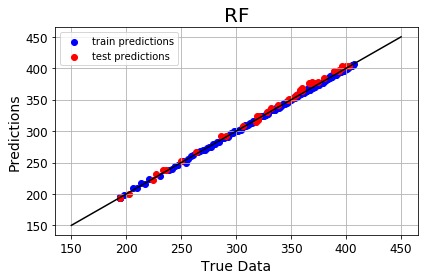

In [18]:
plt.figure
x=np.linspace(150,450,len(ys_test))
plt.plot(x,x,c='k')
plt.scatter(ys_train, ys_rf_train_predictions, c='b',label='train predictions')
plt.scatter(ys_test, ys_rf_test_predictions, c='r', label='test predictions')
plt.grid()
plt.legend()
plt.title("RF", fontsize=20)
plt.xlabel("True Data")
plt.ylabel("Predictions")
save_fig("RF_Prediction_ys")

## Central Limit Theorem

In [0]:
print(cvres['mean_train_score'].shape)
print('Combinations')

(1,)
Combinations


In [0]:
mean_test_score =cvres['mean_test_score']
print(mean_test_score)

[-0.00422803]


In [0]:
mean_train_score =cvres['mean_train_score']
print(mean_train_score)

[-0.00057837]


In [0]:
std_test_score =cvres['std_test_score']
print(std_test_score)

[0.0009599]


In [0]:
std_train_score =cvres['std_train_score']
print(std_test_score)

[0.0009599]


In [0]:
  !ls /content/gdrive

ls: cannot access '/content/gdrive': No such file or directory


In [0]:
with open('/content/gdrive/My Drive/validation/cvscores/Random_Forest/yield_stress/RF_6V.txt', 'w') as f:
  for key in cvres.keys():
    f.write("\n")
    f.write(key)
    f.write(": ")
    f.write(np.str(cvres[key]))
    f.write("\n")


!cat /content/gdrive/My\ Drive/validation/cvscores/Random_Forest/yield_stress/RF_2V.txt


FileNotFoundError: ignored

Train data plotting
---

Saving figure TrainPrediction_with_6V_RF_ParamFitted


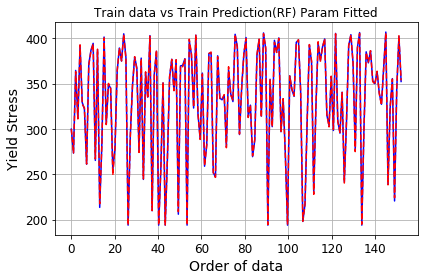

In [31]:
# Difference of train data
xx = np.linspace(0,len(X_train),len(X_train))
plt.figure
plt.grid()
plt.plot(xx,ys_train,"b-", xx, ys_rf_train_predictions,"r--")
plt.title("Train data vs Train Prediction(RF) Param Fitted")
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")
save_fig("TrainPrediction_with_6V_RF_ParamFitted")

Saving figure Difference_between_Train_data_vs_Prediction_6V_RF_ParamFitted


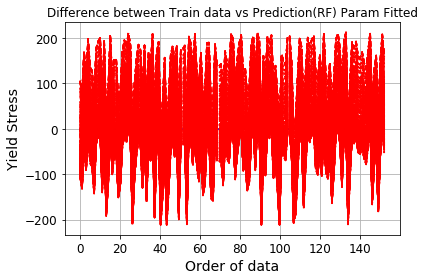

In [32]:
# Difference of train data
difference = ys_train - ys_rf_train_predictions

xx = np.linspace(0,len(difference),len(difference))
y = np.zeros((len(difference),1))
#y.reshape(1,len(difference))
plt.figure
plt.grid()
plt.plot(xx,y,"b-", xx, difference,"r--")
plt.title("Difference between Train data vs Prediction(RF) Param Fitted")
#plt.ylim(-30, 30)
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")

save_fig("Difference_between_Train_data_vs_Prediction_6V_RF_ParamFitted")


Test data plotting
---

Saving figure TestPrediction_with_6V_RF_ParamFitted


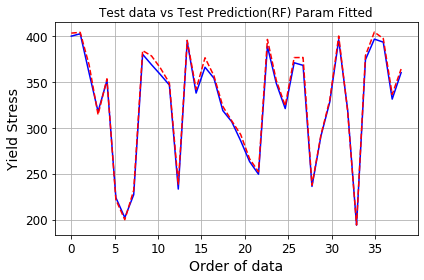

In [33]:
# Difference of train data
xx = np.linspace(0,len(X_test),len(X_test))
plt.figure
plt.grid()
plt.plot(xx,ys_test,"b-", xx, ys_rf_test_predictions,"r--")
plt.title("Test data vs Test Prediction(RF) Param Fitted")
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")
save_fig("TestPrediction_with_6V_RF_ParamFitted")

In [34]:
ys_rf_test_predictions.shape

(38,)

Saving figure Difference_between_Test_data_vs_Prediction_6V_RF_ParamFitted


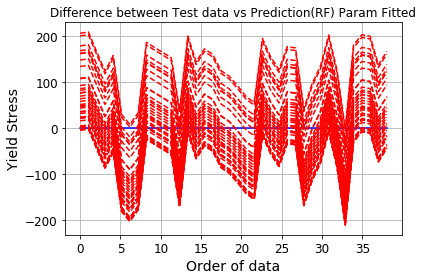

In [35]:
# Difference of train data
difference = ys_test - ys_rf_test_predictions

xx = np.linspace(0,len(difference),len(difference))
y = np.zeros((len(difference),1))
#y.reshape(1,len(difference))
plt.figure
plt.grid()
plt.plot(xx,y,"b-", xx, difference,"r--")
plt.title("Difference between Test data vs Prediction(RF) Param Fitted")
#plt.ylim(-30, 30)
plt.xlabel("Order of data")
plt.ylabel("Yield Stress")

save_fig("Difference_between_Test_data_vs_Prediction_6V_RF_ParamFitted")


## Extracting files

In [0]:
!ls images/BestHyperParameter/RF_Regression/yield_stress_6V/


Difference_between_Train_data_vs_Prediction_6V_RF_ParamFitted.png
RF_Prediction_ys.png
TestPrediction_with_6V_RF_ParamFitted.png
TrainPrediction_with_6V_RF_ParamFitted.png


In [31]:
from google.colab import files
# Upload local files to Colab VM
#uploaded = files.upload()
# Download Colab VM files to local
files.download('images/BestHyperParameter/RF_Regression/yield_stress_6V/TrainPrediction_with_6V_RF_ParamFitted.png')


FileNotFoundError: ignored

In [0]:
files.download('images/BestHyperParameter/RF_Regression/yield_stress_6V/TestPrediction_with_6V_RF_ParamFitted.png')

In [0]:
files.download('images/BestHyperParameter/RF_Regression/yield_stress_6V/Difference_between_Train_data_vs_Prediction_6V_RF_ParamFitted.png')

In [0]:
files.download('images/BestHyperParameter/RF_Regression/yield_stress_6V/Difference_between_Test_data_vs_Prediction_6V_RF_ParamFitted.png')

FileNotFoundError: ignored

In [0]:
files.download('images/BestHyperParameter/RF_Regression/yield_stress_6V/RF_Prediction_ys.png')

In [0]:
files.download('/content/gdrive/My Drive/validation/cvscores/Random_Forest/yield_stress/RF_6V.txt')

## elongation

In [32]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "BestHyperParameter/RF_Regression/elongation_6V"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [25]:
# Normal Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_std, el_train_std)
el_predictions_rf= rf_reg.predict(X_train_std) * np.std(el_train) + np.mean(el_train)
rf_mse = mean_squared_error(el_train, el_predictions_rf)
rf_rmse = np.sqrt(rf_mse)
rf_rmse


C:\Users\kmlee\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.3036390893651342

Hyper Parameters Tuning: GridSearch CV function
---

GridSearchCV implements a “fit” and a “score” method. It also implements “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [39]:
range_2 = [-10, -7,-5, -3, -1, 0]
for i in range(len(range_2)):
    range_2[i] = 10 ** range_2[i]
    
print(range_2)

[1e-10, 1e-07, 1e-05, 0.001, 0.1, 1]


In [40]:
range_2 = [0.835]

In [41]:
range_1 = [1,2,3,4,5]
for i in range(len(range_1)):
    range_1[i] = 10 ** range_1[i]
    
print(range_1)

[10, 100, 1000, 10000, 100000]


In [42]:
range_1 = [75]

In [43]:
range_3 = [3]
print(range_3)

[3]


In [44]:
el_train_std.shape


(152, 1)

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators':[75], 'max_features':[0.835],
   'min_samples_leaf': [3]
                      
    }
  ]

rf_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(rf_reg, param_grid, cv=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train_std, el_train_std.ravel())

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [28]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.835, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=75, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [29]:
grid_search.best_params_

{'max_features': 0.835, 'min_samples_leaf': 3, 'n_estimators': 75}

In [30]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.43236962764128256 {'max_features': 0.835, 'min_samples_leaf': 3, 'n_estimators': 75}


In [31]:
el_rf_final_model = grid_search.best_estimator_

el_rf_final_model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.835, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=75, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False).fit(X_train_std, el_train_std)

In [32]:
el_rf_train_predictions = el_rf_final_model.predict(X_train_std) * np.std(el_train) + np.mean(el_train)
el_rf_train_mse = mean_squared_error(el_train, el_rf_train_predictions)
el_rf_train_rmse = np.sqrt(el_rf_train_mse)
el_rf_train_rmse

0.5048441703477694

In [33]:
X_test_std = np.array(X_test_std)
#X_test_std= X_test_std.reshape(-1, 1)
#X_test_std

In [34]:
el_train_sum = np.zeros(1)

for i in range(1, len(el_train)):
    el_train_sum +=  el_train[i]
    
el_train_avg = el_train_sum / len(el_train)
el_rf_train_err = el_rf_train_rmse / el_train_avg * 100
print("el_rf_train_err: ", el_rf_train_err, '%')

el_rf_train_err:  [10.10948053] %


In [35]:
el_rf_test_predictions = el_rf_final_model.predict(X_test_std) * np.std(el_train) + np.mean(el_train)
el_rf_test_mse = mean_squared_error(el_test,el_rf_test_predictions)
el_rf_test_rmse = np.sqrt(el_rf_test_mse)
el_rf_test_rmse

0.22639681695583516

In [36]:
el_test_sum = np.zeros(1)

for i in range(1, len(el_test)):
    el_test_sum +=  el_test[i]
    
el_test_avg = el_test_sum / len(el_test)
el_rf_test_err = el_rf_test_rmse / el_test_avg * 100
print("el_rf_test_err: ", el_rf_test_err, '%')

el_rf_test_err:  [4.40214905] %


In [37]:
np.savetxt('predictions.csv', el_rf_test_predictions, delimiter=',', fmt='%f')


## importances

In [0]:
# Feature importance

rf_feature_importance = ys_rf_final_model.feature_importances_
print("feature importances\n")
print("1kHz_voltage: ",rf_feature_importance[0])
print("1kHz_Re: ",rf_feature_importance[1])
print("5kHz_voltage : ",rf_feature_importance[3])
print("1kHz_Im: ",rf_feature_importance[2])
print("5kHz_Im: ",rf_feature_importance[5])
print("5kHz_Re: ",rf_feature_importance[4])


feature importances

1kHz_voltage:  0.7579273008581479
1kHz_Re:  0.22809795975670163
5kHz_voltage :  0.012303344125358523
1kHz_Im:  0.000650607478448819
5kHz_Im:  0.0005297504973187848
5kHz_Re:  0.000491037284024455


In [0]:
X_test = pd.DataFrame(X_test)
ys_test = pd.DataFrame(ys_test)

In [0]:
from sklearn.inspection import permutation_importance

result = permutation_importance(ys_rf_final_model, X_test_std, el_test_std.ravel(), n_repeats=10,
                                random_state=42)



In [0]:
perm_sorted_idx = abs(result.importances_mean).argsort()[::-1]
perm_sorted_idx

array([0, 1, 3, 4, 2, 5], dtype=int64)

In [0]:
print("Permutated feature importances\n")
print("1kHz_voltage: ",result.importances_mean[0])
print("1kHz_Re: ",result.importances_mean[1])
print("5kHz_voltage : ",result.importances_mean[3])
print("5kHz_Re: ",result.importances_mean[4])
print("1kHz_Im: ",result.importances_mean[2])
print("5kHz_Im: ",result.importances_mean[5])


Permutated feature importances

1kHz_voltage:  -1.8857714962395842
1kHz_Re:  -0.8076315421982094
5kHz_voltage :  -0.0900500848655796
5kHz_Re:  -0.004706461562472652
1kHz_Im:  -0.002690336963061135
5kHz_Im:  -9.32704920509675e-05


In [0]:
result

{'importances_mean': array([-1.88577150e+00, -8.07631542e-01, -2.69033696e-03, -9.00500849e-02,
        -4.70646156e-03, -9.32704921e-05]),
 'importances_std': array([0.33706101, 0.11328028, 0.00149214, 0.02055346, 0.00163784,
        0.00244759]),
 'importances': array([[-2.19316637e+00, -1.68268895e+00, -1.24827289e+00,
         -2.38574676e+00, -2.14368821e+00, -1.72617558e+00,
         -2.11679920e+00, -1.47989614e+00, -1.82260302e+00,
         -2.05867785e+00],
        [-8.06006872e-01, -7.78122612e-01, -7.89290011e-01,
         -9.03310880e-01, -1.06975728e+00, -7.96499050e-01,
         -7.84378883e-01, -5.90967176e-01, -7.78166925e-01,
         -7.79815731e-01],
        [-1.40999851e-03, -1.40812163e-03, -5.28288121e-03,
         -1.50678943e-03, -1.17223212e-03, -1.59234286e-03,
         -2.11172453e-03, -3.97975969e-03, -3.63943005e-03,
         -4.80008960e-03],
        [-1.04252376e-01, -7.96429580e-02, -1.00261339e-01,
         -1.11159263e-01, -7.34496816e-02, -1.13741567e

## Calculate adj R^2 scores

In [22]:
from sklearn.metrics import r2_score

def r2_adj_score(y_pred, y_true, X):
    r2 = r2_score(y_pred=y_pred, y_true=y_true)
    r2_adj_score = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-X.shape[1]-1)
    
    return r2_adj_score

In [23]:
rf_r2_adj = r2_adj_score(y_pred=el_rf_test_predictions, y_true=el_test, X=X_train)
print('{}'.format(round(rf_r2_adj,4)))

0.9726


In [25]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, mean_squared_error

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rmse, cv_adj_r2 = [], []

print("dataset size: ", X.shape[0])

n_iter = 0
for train_index, test_index in kfold.split(X):
    # train_test_split
    print(' ')
    X = np.array(X)
    X_train_tmp, X_test_tmp = X[train_index], X[test_index]
    el_train_tmp, el_test_tmp = elong[train_index], elong[test_index]
    
    # standardization
    X_train_tmp_std = data_pipeline.fit_transform(X_train_tmp)
    X_test_tmp_std = data_pipeline.fit_transform(X_test_tmp)
    el_train_tmp = np.array(el_train_tmp)
    el_train_tmp = el_train_tmp.reshape(-1,1)
    el_test_tmp = np.array(el_test_tmp)
    el_test_tmp = el_test_tmp.reshape(-1,1)
    el_train_tmp_std, el_test_tmp_std = data_pipeline.fit_transform(el_train_tmp), data_pipeline.fit_transform(el_test_tmp)
        
    # prediction
    el_rf_final_model.fit(X_train_tmp_std, el_train_tmp_std)
    el_pred_tmp = el_rf_final_model.predict(X_test_tmp_std) * np.std(el_train_tmp) + np.mean(el_train_tmp)
    n_iter += 1

    # r2_adj, rmse
    rf_r2_adj_tmp = r2_adj_score(y_pred=el_pred_tmp, y_true=el_test_tmp, X=X_train_tmp)   
    el_mse_tmp = mean_squared_error(el_test_tmp,el_pred_tmp)
    el_rmse_tmp = np.sqrt(el_mse_tmp)
    train_size = X_train_tmp.shape[0]
    test_size = X_test_tmp.shape[0]
    print('{} cv rmse: {}, cv adj r2: {}'.format(n_iter, el_rmse_tmp, rf_r2_adj_tmp))
    print('   train size: {}, test size: {}'.format(train_size, test_size))
    print('{} cv index" {}'.format(n_iter, test_index))
    cv_rmse.append(el_rmse_tmp)
    cv_adj_r2.append(rf_r2_adj_tmp)
    
print('average rmse: ', np.mean(cv_rmse))
print('std rmse: ', np.std(cv_rmse))
print('average adj-r2: ', np.mean(cv_adj_r2))
print('std adj-r2: ', np.std(cv_adj_r2))

dataset size:  190
 
1 cv rmse: 0.24200455898040135, cv adj r2: 0.9687249016305083
   train size: 152, test size: 38
1 cv index" [  5   9  15  16  18  19  24  30  42  45  56  65  66  67  68  75  78  85
  95  97 101 104 109 111 112 120 123 124 127 132 141 155 163 164 168 169
 175 180]
 
2 cv rmse: 0.354403163326537, cv adj r2: 0.9386893819563933
   train size: 152, test size: 38
2 cv index" [  2  11  12  22  26  29  31  35  36  38  41  46  51  55  60  69  76  82
  93  96  98 115 117 118 122 128 133 138 139 140 152 153 156 161 165 178
 181 185]
 
3 cv rmse: 1.2631599057020693, cv adj r2: 0.3275891670326293
   train size: 152, test size: 38
3 cv index" [  0   4   6  10  23  25  27  28  32  39  40  44  64  70  77  79  81  84
  86  90 100 108 113 114 119 125 126 135 136 137 142 144 146 147 150 170
 182 184]
 


C:\Users\kmlee\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\kmlee\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\kmlee\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


4 cv rmse: 0.30927229561654423, cv adj r2: 0.9586502570854674
   train size: 152, test size: 38
4 cv index" [  3   7   8  13  17  33  34  43  47  49  53  59  61  62  72  73  80  83
  89  91  94 105 110 131 143 145 148 154 159 162 166 167 171 172 173 176
 177 187]
 
5 cv rmse: 0.35497416811434135, cv adj r2: 0.9360324411353358
   train size: 152, test size: 38
5 cv index" [  1  14  20  21  37  48  50  52  54  57  58  63  71  74  87  88  92  99
 102 103 106 107 116 121 129 130 134 149 151 157 158 160 174 179 183 186
 188 189]
average rmse:  0.5047628183479786
std rmse:  0.38143656223488553
average adj-r2:  0.8259372297680667
std adj-r2:  0.24947379095885489


C:\Users\kmlee\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\kmlee\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


## Plot diagram for r-value

Saving figure RF_Prediction_el


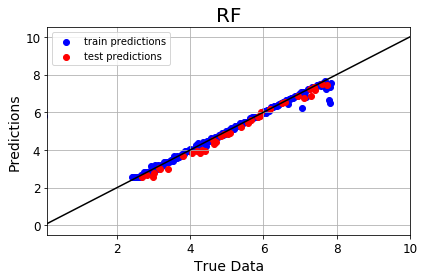

In [29]:
plt.figure
x = np.linspace(0,10,len(el_test))
plt.xlim(0.1,10)
plt.plot(x, x, c='k')
plt.scatter(el_train, el_rf_train_predictions, c='b',label='train predictions')
plt.scatter(el_test, el_rf_test_predictions, c='r', label='test predictions')
plt.grid()
plt.legend()
plt.title("RF", fontsize=20)
plt.xlabel("True Data")
plt.ylabel("Predictions")
save_fig("RF_Prediction_el")

## Central Limit Theorem

In [0]:
print(cvres['mean_train_score'].shape)
print('Combinations')

(1,)
Combinations


In [0]:
mean_test_score =cvres['mean_test_score']
print(mean_test_score)

[-0.17173991]


In [0]:
mean_train_score =cvres['mean_train_score']
print(mean_train_score)

[-0.10049504]


In [0]:
std_test_score =cvres['std_test_score']
print(std_test_score)

[0.82003045]


In [0]:
std_train_score =cvres['std_train_score']
print(std_test_score)

[0.82003045]


In [0]:
  !ls /content/gdrive

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [0]:
with open('/content/gdrive/My Drive/validation/cvscores/Random_Forest/yield_stress/RF_6V.txt', 'w') as f:
  for key in cvres.keys():
    f.write("\n")
    f.write(key)
    f.write(": ")
    f.write(np.str(cvres[key]))
    f.write("\n")


!cat /content/gdrive/My\ Drive/validation/cvscores/Random_Forest/yield_stress/RF_2V.txt


FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/My Drive/validation/cvscores/Random_Forest/yield_stress/RF_6V.txt'

Train data plotting
---

Saving figure TrainPrediction_with_6V_RF_ParamFitted


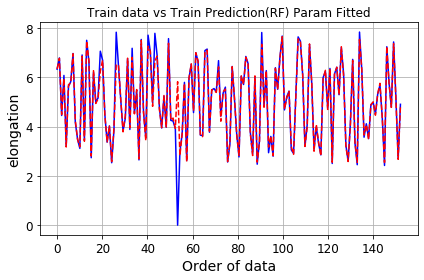

In [58]:
# Difference of train data
xx = np.linspace(0,len(X_train),len(X_train))
plt.figure
plt.grid()
plt.plot(xx,el_train,"b-", xx, el_rf_train_predictions,"r--")
plt.title("Train data vs Train Prediction(RF) Param Fitted")
plt.xlabel("Order of data")
plt.ylabel("elongation")
save_fig("TrainPrediction_with_6V_RF_ParamFitted")

Saving figure Difference_between_Train_data_vs_Prediction_6V_RF_ParamFitted


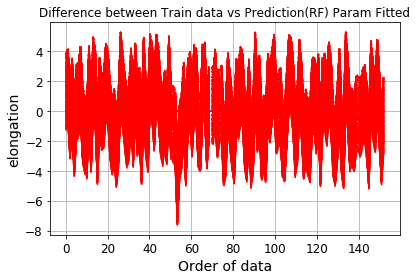

In [59]:
# Difference of train data
difference = el_train - el_rf_train_predictions

xx = np.linspace(0,len(difference),len(difference))
y = np.zeros((len(difference),1))
#y.reshape(1,len(difference))
plt.figure
plt.grid()
plt.plot(xx,y,"b-", xx, difference,"r--")
plt.title("Difference between Train data vs Prediction(RF) Param Fitted")
#plt.ylim(-30, 30)
plt.xlabel("Order of data")
plt.ylabel("elongation")

save_fig("Difference_between_Train_data_vs_Prediction_6V_RF_ParamFitted")


Test data plotting
---

Saving figure TestPrediction_with_6V_RF_ParamFitted


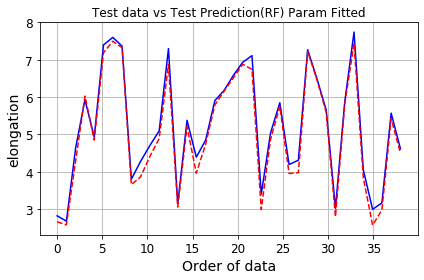

In [60]:
# Difference of train data
xx = np.linspace(0,len(X_test),len(X_test))
plt.figure
plt.grid()
plt.plot(xx,el_test,"b-", xx, el_rf_test_predictions,"r--")
plt.title("Test data vs Test Prediction(RF) Param Fitted")
plt.xlabel("Order of data")
plt.ylabel("elongation")
save_fig("TestPrediction_with_6V_RF_ParamFitted")

Saving figure Difference_between_Test_data_vs_Prediction_6V_RF_ParamFitted


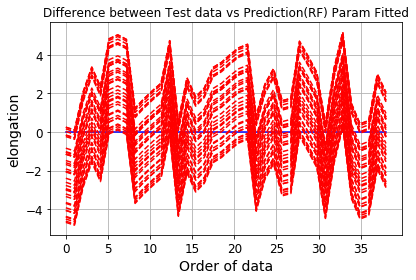

In [61]:
# Difference of train data
difference = el_test - el_rf_test_predictions

xx = np.linspace(0,len(difference),len(difference))
y = np.zeros((len(difference),1))
#y.reshape(1,len(difference))
plt.figure
plt.grid()
plt.plot(xx,y,"b-", xx, difference,"r--")
plt.title("Difference between Test data vs Prediction(RF) Param Fitted")
#plt.ylim(-30, 30)
plt.xlabel("Order of data")
plt.ylabel("elongation")

save_fig("Difference_between_Test_data_vs_Prediction_6V_RF_ParamFitted")


## Extracting files

In [0]:
!ls images/BestHyperParameter/RF_Regression/yield_stress_6V/


Difference_between_Train_data_vs_Prediction_6V_RF_ParamFitted.png
RF_Prediction_ys.png
TestPrediction_with_6V_RF_ParamFitted.png
TrainPrediction_with_6V_RF_ParamFitted.png


In [54]:
from google.colab import files
# Upload local files to Colab VM
#uploaded = files.upload()
# Download Colab VM files to local
files.download('images/BestHyperParameter/RF_Regression/elongation_6V/TrainPrediction_with_6V_RF_ParamFitted.png')


FileNotFoundError: ignored

In [0]:
files.download('images/BestHyperParameter/RF_Regression/elongation_6V/TestPrediction_with_6V_RF_ParamFitted.png')

In [0]:
files.download('images/BestHyperParameter/RF_Regression/elongation_6V/Difference_between_Train_data_vs_Prediction_6V_RF_ParamFitted.png')

In [0]:
files.download('images/BestHyperParameter/RF_Regression/elongation_6V/Difference_between_Test_data_vs_Prediction_6V_RF_ParamFitted.png')

In [0]:
files.download('images/BestHyperParameter/RF_Regression/elongation_6V/RF_Prediction_el.png')

In [0]:
files.download('/content/gdrive/My Drive/validation/cvscores/Random_Forest/elongation/RF_6V.txt')